In [1]:
'/anaconda3/envs/ImageRecognizer/bin/jupyter_mac.command'




'/anaconda3/envs/ImageRecognizer/bin/jupyter_mac.command'

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import imresize

img = cv2.imread('images/complex.png', 0)
img = 255 - cv2.Canny(img, 50, 150, apertureSize=5, L2gradient=True)
W, H = img.shape[:2]

kernel = np.ones((15, 15), np.uint8)
erosion = cv2.erode(img, kernel, iterations=1)
erosion = imresize(erosion, 600 / max(W, H))
erosion = 255 - cv2.Canny(erosion, 50, 150, apertureSize=5, L2gradient=True)

_W, _H = erosion.shape[:2]


def tracePx(x, y):
    visited = []
    ls = [[x, y]]
    while len(ls) != 0:
        cx, cy = ls.pop()
        erosion[cx, cy] = 255

        if cx + 1 < _W and cx - 1 > 0 and cy - 1 > 0 and cy + 1 < _H:
            if erosion[cx + 1, cy + 1] != 255:
                visited.append([cx + 1, cy + 1])
            if erosion[cx + 1, cy - 1] != 255:
                visited.append([cx + 1, cy - 1])
            if erosion[cx - 1, cy + 1] != 255:
                visited.append([cx - 1, cy + 1])
            if erosion[cx - 1, cy - 1] != 255:
                visited.append([cx - 1, cy - 1])
            if erosion[cx, cy + 1] != 255:
                visited.append([cx, cy + 1])
            if erosion[cx, cy - 1] != 255:
                visited.append([cx, cy - 1])
            if erosion[cx + 1, cy] != 255:
                visited.append([cx + 1, cy])
            if erosion[cx - 1, cy] != 255:
                visited.append([cx - 1, cy])
    print(len(visited))
                
                
br = False
for i in range(0, _W):
    if br:
        break
    for j in range(0, _H):
        if erosion[i, j] != 255:
            tracePx(i, j)
            br = True
            break

cv2.imshow('', erosion)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)


/anaconda3/envs/ImageRecognizer/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  if sys.path[0] == '':


2


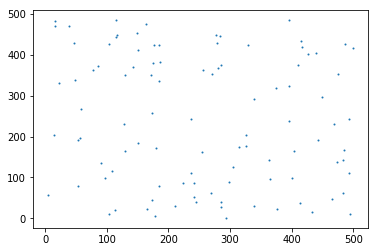

In [ ]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

points = []

while len(points) < 100:
    points.append([random.randint(0, 500), random.randint(0, 500)])

points = np.array(points)
plt.scatter(points[:, 0], points[:, 1], s=1)
plt.show()
    



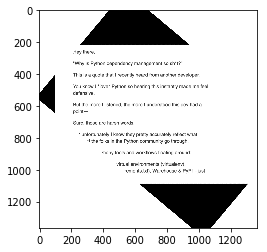

In [6]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread("images/test.png", 0)

W, H = img.shape[:2]

M = cv2.getRotationMatrix2D((W/2, H/2),320.01056057898296 , 1)

img = cv2.warpAffine(img, M, (H,H), borderValue=255)
plt.imshow(img, cmap="gray")
plt.show()
















In [19]:
import numpy as np
from sklearn.cluster import KMeans

x1 = np.array([319.9893266946182,
              230.4977452357428,
              320.01056057898296,
              319.8657051432697,
              318.23116407458605,
              318.4266567726272,
              319.2080430440072,
              314.35096681664527,
              319.97611747516135,
              319.88262569337763,
              320.85712022748703,
              319.6106875395041,
              230.61856579320613
              ])
x2 = np.zeros((len(x1)))

X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
K = 2

kmeans_model = KMeans(n_clusters=K).fit(X)

centers = np.array(kmeans_model.cluster_centers_)
print(centers)
min = 10000000
xcc = 0
for x, y in centers:
    cc = 0
    
    for xx in x1:
        cc += (np.math.fabs(x-xx)**2)
    if cc < min:
        min = cc
        xcc = x

print(xcc)
    
        

[[ 319.12808855    0.        ]
 [ 230.55815551    0.        ]]
319.128088551


In [25]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt     

img = cv2.imread("images/ro.png")
W, H = img.shape[:2]
M = cv2.getRotationMatrix2D((W/2, H/2), 37.5,1)

newIMG = cv2.warpAffine(img, M, (W, H), borderValue=(255,255,255))


cv2.imwrite("images//newrotation.png", newIMG)


True